In [1]:
## Import Modules:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
import numpy as np

## Configure Modules:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
## Import Dataset
dataset = pd.read_csv('purchase-data.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
## Convert Dataframe to Feature Values
X = dataset.iloc[:, [2, 3]].values ## Get X Values: Age, Estimated Salary
y = dataset.iloc[:, [4]].values ## Get Y values: Purchased (y/n)
print('Dataset Features shape (X): {0} (instances, features)'.format(X.shape))
print('Dataset Labels shape (y): {0} (labels)'.format(y.shape))
## Split Dataset into Training and Test dataset
# Note: 'test_size' = percent of dataset allocated to test dataset, 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state=0)
######## Normalize Training Dataset: 
## Standardize features by removing the mean and scaling to unit variance; Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Dataset Features shape (X): (400, 2) (instances, features)
Dataset Labels shape (y): (400, 1) (labels)


In [4]:
########################################################
######## Training Dataset:
print('Training Dataset Features shape (X_train): {0} (instances, features)'.format(X_train.shape))
print('Training Dataset Labels shape (y_train): {0} (labels)'.format(y_train.shape))
## Explore Training Dataset:
X_train_df = pd.DataFrame(X_train, columns = ['age','estimated salary'])
y_train_df = pd.DataFrame(y_train, columns = ['purchased'])
training_dataset = pd.concat([X_train_df, y_train_df], axis=1)
training_dataset.head()

Training Dataset Features shape (X_train): (340, 2) (instances, features)
Training Dataset Labels shape (y_train): (340, 1) (labels)


,age,estimated salary,purchased
0,-0.582524,-1.509921,0
1,2.096523,-0.810979,1
2,-1.826367,0.179190,0
3,-0.199803,0.849009,1
4,-1.826367,-1.276940,0


In [5]:
########################################################
######## Validation Dataset:
print('Validation Dataset Features shape (X_test): {0} (instances, features)'.format(X_test.shape))
print('Validation Dataset Labels shape (y_test): {0} (labels)'.format(y_test.shape))
######## Normalize Training Dataset: 
## Explore Training Dataset:
X_test_df = pd.DataFrame(X_test, columns = ['age','estimated salary'])
y_test_df = pd.DataFrame(y_test, columns = ['purchased'])
validation_dataset = pd.concat([X_test_df, y_test_df], axis=1)
validation_dataset.head()

Validation Dataset Features shape (X_test): (60, 2) (instances, features)
Validation Dataset Labels shape (y_test): (60, 1) (labels)


,age,estimated salary,purchased
0,-0.773884,0.499538,0
1,-0.008442,-0.577998,0
2,-0.295483,0.150067,0
3,-0.773884,0.266557,0
4,-0.295483,-0.577998,0


In [6]:
col_name_Y = 'purchased'
col_name_X = ['age','estimated salary']

def validate_model(X_test, col_name_Y, col_name_X, k_value):
    ## Validate Model
    # Train Model using the Training Dataset
    k = k_value
    classifier = KNeighborsClassifier(n_neighbors = k, ## Number of neighbors to use for kneighbors queries (default=5).
                                      metric = 'minkowski', ## Metric to use for distance computation. Default is “minkowski”, which results in the standard Euclidean distance when p=2.
                                      p = 2) ## Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
    classifier.fit(X_train, y_train.ravel()) ## Fit is used for training the model with the provided inputs and targets
    # print(col_name_X)
    # print(col_name_Y)
    y_pred = classifier.predict(X_test)
    y_pred_df = pd.DataFrame(y_pred, columns = [col_name_Y])
    validation_predictions_df = pd.concat([X_test_df, y_pred_df], axis=1)
    #################
    ## Predictions
    label_prediction_true_df = validation_predictions_df[(validation_predictions_df[col_name_Y] == True)]
    label_prediction_false_df = validation_predictions_df[(validation_predictions_df[col_name_Y] == False)]
    ## Truths
    validation_dataset_true_df = validation_dataset[(validation_dataset[col_name_Y] == True)]
    validation_dataset_false_df = validation_dataset[(validation_dataset[col_name_Y] == False)]
    ## Compare Predictions vs Truths
    validation_predictions_df.compare(validation_dataset, keep_equal=False)
    ## Create Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # print(cm)
    #################
    true_positives_df = pd.merge(validation_dataset_true_df, label_prediction_true_df, how='left', on=col_name_X) # text = spam; prediction = spam
    false_positives_df = pd.merge(label_prediction_true_df, validation_dataset_false_df, how='left', on=col_name_X) # text = spam; prediction = spam
    true_negatives_df = pd.merge(validation_dataset_false_df, label_prediction_false_df, how='left', on=col_name_X) # text = spam; prediction = spam
    false_negatives_df = pd.merge(label_prediction_false_df, validation_dataset_true_df, how='left', on=col_name_X) # text = spam; prediction = spam
    #################
    true_positives_count = true_positives_df[(true_positives_df['purchased_y'] == 1.0)]['purchased_y'].count()
    false_positives_count = false_positives_df[(false_positives_df['purchased_y'] == 0.0)]['purchased_y'].count()
    true_negatives_count = true_negatives_df[(true_negatives_df['purchased_y'] == 0.0)]['purchased_y'].count()
    false_negatives_count = false_negatives_df[(false_negatives_df['purchased_y'] == 1.0)]['purchased_y'].count()
    # print('TP: {0}'.format(true_positives_count))
    # print('FP: {0}'.format(false_positives_count))
    # print('TN: {0}'.format(true_negatives_count))
    # print('FN: {0}'.format(false_negatives_count))
    #################
    accuracy = true_positives_count / (true_positives_count + false_positives_count + true_negatives_count + false_negatives_count)
    precision = true_positives_count / (true_positives_count + false_positives_count)
    recall = true_positives_count / (true_positives_count + false_negatives_count)
    # print('Accuracy: {0}%'.format(accuracy)) # Accuracy = TP / P
    # print('Precision: {0}%'.format(precision)) # Precision = TP / (TP + FP)
    # print('Recall: {0}%'.format(recall)) # Recall = TP / (TP + FN)
    return k, accuracy, precision, recall

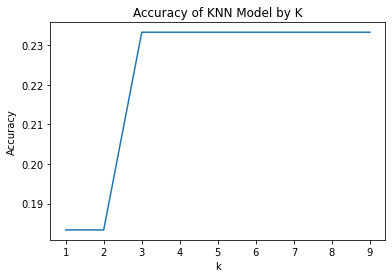

In [7]:
# Train Model using the Training Dataset across a variety of k's to find most optimal k
accuracy_list = []
k_list = []
ks = range(1, 10)
for k in ks:
    # print('k = {0}'.format(k))
    k, accuracy, precision, recall = validate_model(X_test, col_name_Y, col_name_X, k)
    k_list.append(k)
    accuracy_list.append(accuracy)
    # print('\n')

# Visualize accuracy vs k
fig, ax = plt.subplots()
ax.plot(k_list, accuracy_list)
ax.set(xlabel='k',
       ylabel='Accuracy',
       title='Accuracy of KNN Model by K')
## Resize Plot:
plt.rcParams['figure.figsize'] = [15, 5] 
plt.rcParams['figure.autolayout'] = True
plt.show()

In [8]:
# Train Model using the Training Dataset
k = 3
classifier = KNeighborsClassifier(n_neighbors = k, ## Number of neighbors to use for kneighbors queries (default=5).
                                  metric = 'minkowski', ## Metric to use for distance computation. Default is “minkowski”, which results in the standard Euclidean distance when p=2.
                                  p = 2) ## Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.
classifier.fit(X_train, y_train.ravel()) ## Fit is used for training the model with the provided inputs and targets

KNeighborsClassifier(n_neighbors=3)

In [9]:
## Debug & Tune Model: Review Machine Learning Label Output vs Debugging Dataset Label
#### IF inspired THEN fix issues (dataset, hyperparameters, etc.)
age = 86
estimated_salary = 10000
X_debug = [[age, estimated_salary]]
# print(X_debug)
X_debug = sc.transform(X_debug)
# print(X_debug)
y_pred_debug = classifier.predict(X_debug)
print('For age={0} and estimated_salary={1} the predicted purchase value is {2}'.format(age, estimated_salary, y_pred_debug))

For age=86 and estimated_salary=10000 the predicted purchase value is [1]


In [10]:
## Validate Model
y_pred = classifier.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns = ['purchased'])
validation_predictions_df = pd.concat([X_test_df, y_pred_df], axis=1)
#################
## Predictions
label_prediction_true_df = validation_predictions_df[(validation_predictions_df['purchased'] == True)]
label_prediction_false_df = validation_predictions_df[(validation_predictions_df['purchased'] == False)]
## Truths
validation_dataset_true_df = validation_dataset[(validation_dataset['purchased'] == True)]
validation_dataset_false_df = validation_dataset[(validation_dataset['purchased'] == False)]
## Compare Predictions vs Truths
validation_predictions_df.compare(validation_dataset, keep_equal=False)
## Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#################
true_positives_df = pd.merge(validation_dataset_true_df, label_prediction_true_df, how='left', on=['age','estimated salary']) # text = spam; prediction = spam
false_positives_df = pd.merge(label_prediction_true_df, validation_dataset_false_df, how='left', on=['age','estimated salary']) # text = spam; prediction = spam
true_negatives_df = pd.merge(validation_dataset_false_df, label_prediction_false_df, how='left', on=['age','estimated salary']) # text = spam; prediction = spam
false_negatives_df = pd.merge(label_prediction_false_df, validation_dataset_true_df, how='left', on=['age','estimated salary']) # text = spam; prediction = spam
#################
true_positives_count = true_positives_df[(true_positives_df['purchased_y'] == 1.0)]['purchased_y'].count()
false_positives_count = false_positives_df[(false_positives_df['purchased_y'] == 0.0)]['purchased_y'].count()
true_negatives_count = true_negatives_df[(true_negatives_df['purchased_y'] == 0.0)]['purchased_y'].count()
false_negatives_count = false_negatives_df[(false_negatives_df['purchased_y'] == 1.0)]['purchased_y'].count()
print('TP: {0}'.format(true_positives_count))
print('FP: {0}'.format(false_positives_count))
print('TN: {0}'.format(true_negatives_count))
print('FN: {0}'.format(false_negatives_count))
print('\n')
#################
accuracy = true_positives_count / (true_positives_count + false_positives_count + true_negatives_count + false_negatives_count)
precision = true_positives_count / (true_positives_count + false_positives_count)
recall = true_positives_count / (true_positives_count + false_negatives_count)
print('Accuracy: {0}%'.format(accuracy)) # Accuracy = TP / P
print('Precision: {0}%'.format(precision)) # Precision = TP / (TP + FP)
print('Recall: {0}%'.format(recall)) # Recall = TP / (TP + FN)

[[42  3]
 [ 1 14]]
TP: 14
FP: 3
TN: 42
FN: 1


Accuracy: 0.23333333333333334%
Precision: 0.8235294117647058%
Recall: 0.9333333333333333%


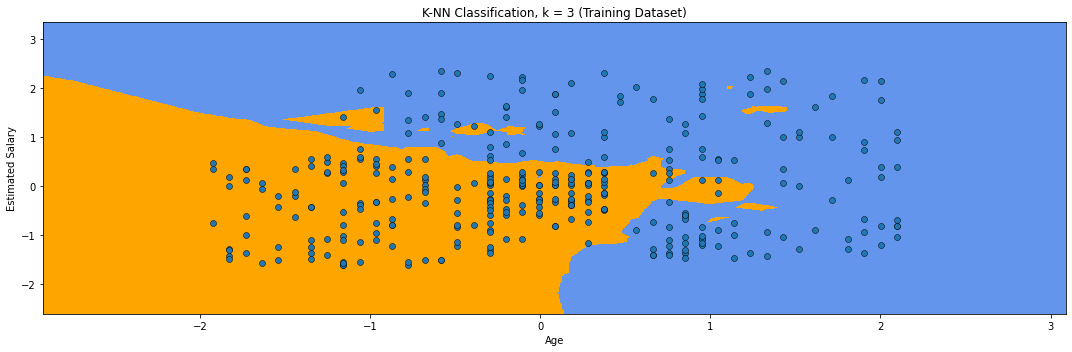

In [11]:
# Visualising the Training Dataset results
X, y = X_train, y_train
step = .01 # Change the strength of the area shown on chart per classification
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(start = x_min, 
                               stop = x_max, 
                               step = step), 
                     np.arange(start = y_min, 
                               stop = y_max, 
                               step = step))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()

plt.contourf(xx, yy, Z, cmap = ListedColormap(['orange','cornflowerblue']))

sns.scatterplot(x=X[:, 0], y=X[:, 1], alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('K-NN Classification, k = {0} (Training Dataset)'.format(k))
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
# plt.legend()
plt.show()

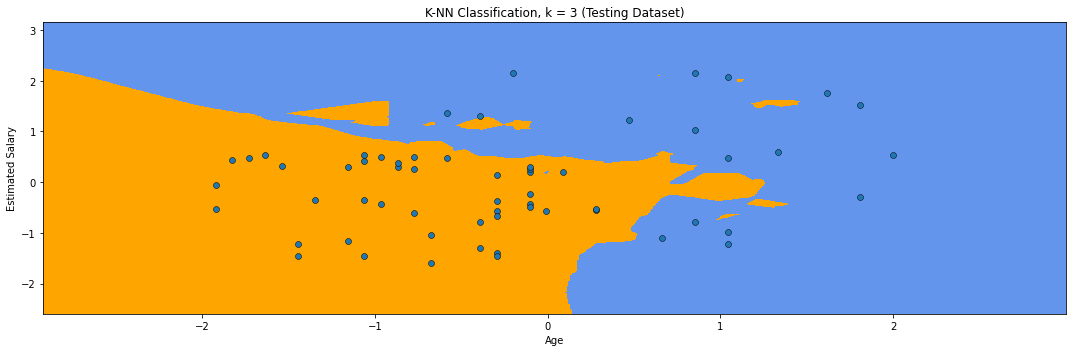

In [12]:
# Visualising the Testing Dataset results
X, y = X_test, y_test
step = .01 # Change the strength of the area shown on chart per classification
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(start = x_min, 
                               stop = x_max, 
                               step = step), 
                     np.arange(start = y_min, 
                               stop = y_max, 
                               step = step))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()

plt.contourf(xx, yy, Z, cmap = ListedColormap(['orange','cornflowerblue']))

sns.scatterplot(x=X[:, 0], y=X[:, 1], alpha=1.0, edgecolor="black")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('K-NN Classification, k = {0} (Testing Dataset)'.format(k))
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
# plt.legend()
plt.show()